# Machine learning

Can we predict particulate matter using machine learning algorithms?

Let's try it

Import necessary packages

In [6]:
import pandas as pd
import numpy as np
#!python -m pip -y uninstall matplotlib

import seaborn as sns
!git clone -l -s https://github.com/ogunjosam/ISIMIP_data.git
%cd ISIMIP_data
from pyESN import ESN


!pip install matplotlib==3.1.3
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1 import host_subplot

Cloning into 'ISIMIP_data'...
remote: Enumerating objects: 87, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 87 (delta 1), reused 0 (delta 0), pack-reused 81
Unpacking objects: 100% (87/87), done.
/content/ISIMIP_data
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 13.1 MB 5.9 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2


Import data from Github

(300.0, 360.0)

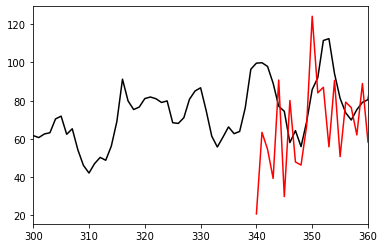

In [20]:
url  = 'https://github.com/ogunjosam/CARNASRDA_python_training/raw/main/osogbo.csv'

# we select column and set index columns
xx = pd.read_csv(url,index_col='created_at',usecols=[0,2,3,4,7,8],parse_dates=True)
xx['PM1.0_CF1_ug/m3'][xx['PM1.0_CF1_ug/m3'] > 300] = np.nan
xx['PM2.5_CF1_ug/m3'][xx['PM2.5_CF1_ug/m3'] > 300] = np.nan
xx['PM10.0_CF1_ug/m3'][xx['PM10.0_CF1_ug/m3'] > 300] = np.nan
xx = xx.resample('H').mean()
xx = xx.dropna(how='any')
xx

trainlen, future = 340, 25

esn = ESN(n_inputs = 1,
          n_outputs = 1,
          n_reservoir = 250,
          spectral_radius = 0.40,
          teacher_forcing = False,
          teacher_scaling = 1.9,
          random_state=42)
  

pred_training = esn.fit(np.ones(trainlen),xx['PM10.0_CF1_ug/m3'][:trainlen].values)

prediction = esn.predict(np.ones(future))



pred_training, prediction

plt.plot(range(0,trainlen+future),xx['PM10.0_CF1_ug/m3'][0:trainlen+future],'k',label="target system")
plt.plot(range(trainlen,trainlen+future),prediction,'r', label="free running ESN")
plt.xlim([300,360])
#lo,hi = plt.set_ylim()
#plt.plot([trainlen,trainlen],[lo+np.spacing(1),hi-np.spacing(1)],'k:')